In [1]:
#import
import pandas as pd
import csv

In [2]:
#replace & split
text = open("output.log", "r")
text = ''.join([i for i in text]) \
    .replace("]", "[")
x = open("output.csv","w")
x.writelines(text)
x.close()

In [3]:
with open("output.csv") as f, open('logfile.csv', 'w') as f2:
    writer = csv.writer(f2)
    writer.writerow(['Index', 'IP', 'time','', 'methodpath', 'statuscode&responselength','','useragent','', 'responsetime']) 

    i = 0
    for line in f:
        writer.writerow([i] + line.rstrip().split('['))
        i += 1
        if i == 1260037:
            break

In [4]:
data=pd.read_csv("logfile.csv",error_bad_lines=False)

b'Skipping line 601731: expected 10 fields, saw 12\n'


In [5]:
new = data['statuscode&responselength'].str.split(" ", n = 2, expand = True)
    
data["statuscode"]= new[1]
data["responselength"]= new[2]
data.drop(columns =["statuscode&responselength"], inplace = True)

new = data["methodpath"].str.split(" ", n = 2, expand = True)
    
data["method"]= new[0]
data["path"]= new[1]
data.drop(columns =["methodpath"], inplace = True)

In [6]:
data.drop(columns =["Index","Unnamed: 3","Unnamed: 6","Unnamed: 8"], inplace = True)

In [7]:
#feature extracction "hour"
import datetime
data["time"] = pd.to_datetime(data["time"])
data["hour"] = data["time"].dt.hour-data["time"].dt.hour.max()+10

In [8]:
#feature extraction "request"
import numpy as np
import janitor
from janitor import groupby_agg
data['request1']=1
filtered_df = data.groupby_agg(by=['hour','IP','useragent'],
                              agg='size',
                              agg_column_name= 'request1',
                              new_column_name='request'
                             )

In [247]:
filtered_df.head()

,IP,time,useragent,responsetime,statuscode,responselength,method,path,hour,request1,request
0,207.213.193.143,2021-05-12 05:06:00+04:30,Googlebot-Image/1.0,32,304,0,Get,/cdn/profiles/1026106239,0,1,2086
1,207.213.193.143,2021-05-12 05:06:00+04:30,Googlebot-Image/1.0,4,304,0,Get,images/badge.png,0,1,2086
2,35.110.222.153,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,32,200,52567,Get,/pages/630180847,0,1,15
3,35.108.208.99,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0; CAM-L21) Appl...,20,200,23531,Get,images/fav_icon2.ico,0,1,45
4,35.110.222.153,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,8,200,4680,Get,images/sanjagh_logo_purpule5.png,0,1,15


In [10]:
# drop under 4 request
rslt_df = filtered_df[filtered_df['request'] > 9]
rslt_df=rslt_df.drop(['request1'], axis=1)

In [11]:
#encode statuscode
rslt_df['statuscode']= rslt_df['statuscode'].astype(int) // 100

In [248]:
rslt_df.head()

,IP,time,useragent,responsetime,statuscode,responselength,method,path,hour,request,depth,robot,anomaly
0,207.213.193.143,2021-05-12 05:06:00+04:30,Googlebot-Image/1.0,32,3,0,Get,/cdn/profiles/1026106239,0,2086,3,0,False
1,207.213.193.143,2021-05-12 05:06:00+04:30,Googlebot-Image/1.0,4,3,0,Get,images/badge.png,0,2086,1,0,False
2,35.110.222.153,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,32,2,52567,Get,/pages/630180847,0,15,2,0,False
3,35.108.208.99,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0; CAM-L21) Appl...,20,2,23531,Get,images/fav_icon2.ico,0,45,1,0,False
4,35.110.222.153,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,8,2,4680,Get,images/sanjagh_logo_purpule5.png,0,15,1,0,False


In [13]:
#missing values
rslt_df = rslt_df[rslt_df['IP'] != '- ']
rslt_df['responsetime'].loc[(rslt_df['responsetime'] == ' -')] = 0
rslt_df['depth']= rslt_df['path'].str.count('/')

/Users/mohammad/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mohammad/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-13-40a34f8fd615>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [14]:
#feature extraction "robot"
rslt_df['robot']=rslt_df['path'].str.contains("robots.txt")
rslt_df['robot'] = rslt_df['robot']*1
rslt_df['robot'].value_counts()

<ipython-input-14-35c240f9cb0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['robot']=rslt_df['path'].str.contains("robots.txt")
<ipython-input-14-35c240f9cb0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['robot'] = rslt_df['robot']*1


0    1142046
1        104
Name: robot, dtype: int64

In [15]:
#create anomaly labels column
rslt_df['anomaly']=0
rslt_df['anomaly']=rslt_df['useragent'].str.contains("Googlebot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("python")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("Go-http-client")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("MBCrawler")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("MJ12bot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("facebookexternalhit")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("Googlebot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("CCBot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("FreshpingBot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("AdsBot-Google")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("okhttp")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("Twitterbot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("UptimeRobot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("CFNetwork")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("PetalBot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("AhrefsBot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("SemrushBot")
rslt_df['anomaly']=rslt_df['useragent'].str.contains("bingbot")

<ipython-input-15-584aaa50454b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['anomaly']=0
<ipython-input-15-584aaa50454b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['anomaly']=rslt_df['useragent'].str.contains("Googlebot")
<ipython-input-15-584aaa50454b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [16]:
rslt_df['anomaly'].value_counts()

False    1139814
True        2336
Name: anomaly, dtype: int64

In [17]:
rslt_df['anomaly'].value_counts()

False    1139814
True        2336
Name: anomaly, dtype: int64

In [18]:
rslt_df_3=rslt_df.copy()
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [249]:
rslt_df_3.head()

,IP,time,useragent,responsetime,statuscode,responselength,method,path,hour,request,...,"(Get,)","(Head,)","(Options,)","(Post,)","(Put,)","(1,)","(2,)","(3,)","(4,)","(5,)"
0,207.213.193.143,2021-05-12 05:06:00+04:30,Googlebot-Image/1.0,32,3,0,Get,/cdn/profiles/1026106239,0,2086,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,207.213.193.143,2021-05-12 05:06:00+04:30,Googlebot-Image/1.0,4,3,0,Get,images/badge.png,0,2086,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35.110.222.153,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,32,2,52567,Get,/pages/630180847,0,15,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35.108.208.99,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0; CAM-L21) Appl...,20,2,23531,Get,images/fav_icon2.ico,0,45,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35.110.222.153,2021-05-12 05:06:00+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,8,2,4680,Get,images/sanjagh_logo_purpule5.png,0,15,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
rslt_df_3['time'] = pd.to_datetime(rslt_df_3['time'])

In [21]:
#OneHotEncoding "statuscode" & "method"
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
result = ohe.fit_transform(rslt_df_3[['statuscode']])
print(ohe.categories_)
print(result)

print(pd.DataFrame(result, columns=ohe.categories_))
a1=pd.DataFrame(result, columns=ohe.categories_,index=rslt_df.index)

ohe1 = OneHotEncoder(sparse=False)

result2 = ohe1.fit_transform(rslt_df_3[['method']].astype(str))

print(ohe1.categories_)
print(result2)


print(pd.DataFrame(result2, columns=ohe1.categories_))
a2=pd.DataFrame(result2, columns=ohe1.categories_,index=rslt_df.index)

rslt_df_3=pd.concat((rslt_df_3,a2),axis=1)
rslt_df_3=pd.concat((rslt_df_3,a1),axis=1)

[array([1, 2, 3, 4, 5])]
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
           1    2    3    4    5
0        0.0  0.0  1.0  0.0  0.0
1        0.0  0.0  1.0  0.0  0.0
2        0.0  1.0  0.0  0.0  0.0
3        0.0  1.0  0.0  0.0  0.0
4        0.0  1.0  0.0  0.0  0.0
...      ...  ...  ...  ...  ...
1142145  0.0  0.0  1.0  0.0  0.0
1142146  0.0  0.0  1.0  0.0  0.0
1142147  0.0  0.0  1.0  0.0  0.0
1142148  0.0  0.0  1.0  0.0  0.0
1142149  0.0  0.0  1.0  0.0  0.0

[1142150 rows x 5 columns]
[array(['Get', 'Head', 'Options', 'Post', 'Put'], dtype=object)]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
         Get Head Options Post  Put
0        1.0  0.0     0.0  0.0  0.0
1        1.0  0.0     0.0  0.0  0.0
2        1.0  0.0     0.0  0.0  0.0
3        1.0  0.0     0.0  0.0  0.0
4        1.0  0.0     0.0  0.0  0.0
...      ...  ...     ...  ...  ...
114214

In [22]:
from joblib import dump, load

In [23]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [24]:
#save OneHotEncode
ohe_filename = "ohe_data"
dump(ohe, ohe_filename)

['ohe_data']

In [25]:
#save OneHotEncode
ohe1_filename = "ohe1_data"
dump(ohe1, ohe1_filename)

['ohe1_data']

In [26]:
#Train Test Split
train, test = rslt_df_3.loc[rslt_df_3['hour'] <= 7 ], rslt_df_3.loc[rslt_df_3['hour'] > 7]
train.shape, test.shape

((770854, 23), (371296, 23))

In [27]:
#MinMaxScaler "depth"
scaler = MinMaxScaler()
scaler = scaler.fit(train[['depth']])

train['depth'] = scaler.transform(train[['depth']])
test['depth'] = scaler.transform(test[['depth']])

<ipython-input-27-a4c131f41008>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['depth'] = scaler.transform(train[['depth']])
<ipython-input-27-a4c131f41008>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['depth'] = scaler.transform(test[['depth']])


In [28]:
train['depth']

0         0.50
1         0.00
2         0.25
3         0.00
4         0.00
          ... 
851762    0.00
851763    0.25
851764    0.00
851765    0.50
851766    0.00
Name: depth, Length: 770854, dtype: float64

In [29]:
#save scaler
scaler_filename = "scaler_data"
dump(scaler, scaler_filename)

['scaler_data']

In [30]:
#QuantileTransform "responsetime" & "responselength" 
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import quantile_transform
qt=QuantileTransformer(n_quantiles=10, random_state=0)
qt=qt.fit(train[['responsetime']])
train['responsetime'] = qt.transform(train[['responsetime']])
test['responsetime'] = qt.transform(test[['responsetime']])


<ipython-input-30-fd5fa77df08d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['responsetime'] = qt.transform(train[['responsetime']])
<ipython-input-30-fd5fa77df08d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['responsetime'] = qt.transform(test[['responsetime']])


In [31]:
#save QuantileTransforms
qt_filename = "qt_data"
dump(qt, qt_filename)

['qt_data']

In [32]:
qt1=QuantileTransformer(n_quantiles=10, random_state=0)
qt1=qt.fit(train[['responselength']])
train['responselength'] = qt1.transform(train[['responselength']])
test['responselength'] = qt1.transform(test[['responselength']])

<ipython-input-32-4f149e57de78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['responselength'] = qt1.transform(train[['responselength']])
<ipython-input-32-4f149e57de78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['responselength'] = qt1.transform(test[['responselength']])


In [33]:
qt1_filename = "qt1_data"
dump(qt1, qt1_filename)

['qt1_data']

In [34]:
#feature extraction "ip_agent"
train['ip_agent']=train.IP+':'+train.useragent
test['ip_agent']=test.IP+':'+test.useragent

<ipython-input-34-cb98bdb83866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ip_agent']=train.IP+':'+train.useragent
<ipython-input-34-cb98bdb83866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ip_agent']=test.IP+':'+test.useragent


In [250]:
#create dataframe base on per ip_agent
train_precision=train.groupby('ip_agent').tail(1)
train_precision.head()

,IP,time,useragent,responsetime,responselength,hour,depth,robot,"(Get,)","(Head,)","(Options,)","(Post,)","(Put,)","(1,)","(2,)","(3,)","(4,)","(5,)",ip_agent
64,41.181.1.76,2021-05-12 05:06:02+04:30,Mozilla/5.0 (Linux; Android 9; G9) AppleWebKit...,0.388889,0.000000,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.181.1.76 :Mozilla/5.0 (Linux; Android 9; G9...
120,4.138.31.112,2021-05-12 05:06:03+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SM-C5010) A...,0.500000,0.730255,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.138.31.112 :Mozilla/5.0 (Linux; Android 6.0....
154,35.117.114.180,2021-05-12 05:06:05+04:30,Mozilla/5.0 (Linux; Android 9; SM-A105F) Apple...,0.500000,0.334102,0,0.5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,35.117.114.180 :Mozilla/5.0 (Linux; Android 9;...
159,35.110.222.153,2021-05-12 05:06:06+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,0.166667,0.797806,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.110.222.153 :Mozilla/5.0 (Linux; Android 6....
174,131.200.114.188,2021-05-12 05:06:06+04:30,Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) A...,0.166667,0.000000,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131.200.114.188 :Mozilla/5.0 (Linux; Android 8...


In [251]:
test_precision=test.groupby('ip_agent').tail(1)
test_precision.head()

,IP,time,useragent,responsetime,responselength,hour,depth,robot,"(Get,)","(Head,)","(Options,)","(Post,)","(Put,)","(1,)","(2,)","(3,)","(4,)","(5,)",ip_agent
852120,35.41.235.122,2021-05-12 13:00:03+04:30,Mozilla/5.0 (Linux; Android 9; SM-G965F) Apple...,0.166667,0.000000,8,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.41.235.122 :Mozilla/5.0 (Linux; Android 9; ...
852271,127.171.149.195,2021-05-12 13:00:05+04:30,Mozilla/5.0 (Linux; Android 9; SM-A505F) Apple...,0.388889,0.713867,8,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,127.171.149.195 :Mozilla/5.0 (Linux; Android 9...
852299,148.254.115.7,2021-05-12 13:00:06+04:30,Mozilla/5.0 (Linux; Android 10; M2007J20CG) Ap...,0.166667,0.000000,8,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,148.254.115.7 :Mozilla/5.0 (Linux; Android 10;...
852323,14.233.136.41,2021-05-12 13:00:06+04:30,Mozilla/5.0 (Linux; Android 9; SM-A605F) Apple...,0.388889,0.000000,8,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.233.136.41 :Mozilla/5.0 (Linux; Android 9; ...
852336,128.201.236.133,2021-05-12 13:00:06+04:30,Mozilla/5.0 (Linux; Android 7.0; PRA-LA1) Appl...,0.166667,0.807042,8,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,128.201.236.133 :Mozilla/5.0 (Linux; Android 7...


In [37]:
#drop columns
train.drop(columns =["statuscode","method","path","request","anomaly"], inplace = True)
test.drop(columns =["statuscode","method","path","request","anomaly"], inplace = True)
train.columns

/Users/mohammad/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index([            'IP',           'time',      'useragent',   'responsetime',
       'responselength',           'hour',          'depth',          'robot',
               ('Get',),        ('Head',),     ('Options',),        ('Post',),
               ('Put',),             (1,),             (2,),             (3,),
                   (4,),             (5,),       'ip_agent'],
      dtype='object')

In [38]:
df_train=train.set_index(['ip_agent','time']).sort_index()
df_test=test.set_index(['ip_agent','time']).sort_index()

In [39]:
#drop columns
df_train.drop(columns =["IP","useragent","hour"], inplace = True)
df_test.drop(columns =["IP","useragent","hour"], inplace = True)

In [252]:
df_train.head()

responsetime  \
ip_agent                                           time                                      
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30      0.888890   
                                                   2021-05-12 09:45:59+04:30      0.166667   
                                                   2021-05-12 09:45:59+04:30      0.388889   
                                                   2021-05-12 09:45:59+04:30      0.500000   
                                                   2021-05-12 09:45:59+04:30      0.833333   

                                                                              responselength  \
ip_agent                                           time                                        
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30        0.888900   
                                                   2021-05-12 09:45:59+04:30        0.496599   
                                                   2021-05-12 09:45:59+04:30        0.761694   
                                                   2021-05-12 09:45:59+04:30        0.889126   
                                                   2021-05-12 09:45:59+04:30        0.591259   

                                                                              depth  \
ip_agent                                           time                               
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30    0.5   
                                                   2021-05-12 09:45:59+04:30    0.0   
                                                   2021-05-12 09:45:59+04:30    0.0   
                                                   2021-05-12 09:45:59+04:30    0.0   
                                                   2021-05-12 09:45:59+04:30    0.5   

                                                                              robot  \
ip_agent                                           time                               
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30      0   
                                                   2021-05-12 09:45:59+04:30      0   
                                                   2021-05-12 09:45:59+04:30      0   
                                                   2021-05-12 09:45:59+04:30      0   
                                                   2021-05-12 09:45:59+04:30      0   

                                                                              (Get,)  \
ip_agent                                           time                                
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30     1.0   
                                                   2021-05-12 09:45:59+04:30     1.0   
                                                   2021-05-12 09:45:59+04:30     1.0   
                                                   2021-05-12 09:45:59+04:30     1.0   
                                                   2021-05-12 09:45:59+04:30     1.0   

                                                                              (Head,)  \
ip_agent                                           time                                 
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30      0.0   
                                                   2021-05-12 09:45:59+04:30      0.0   
                                                   2021-05-12 09:45:59+04:30      0.0   
                                                   2021-05-12 09:45:59+04:30      0.0   
                                                   2021-05-12 09:45:59+04:30      0.0   

                                                                              (Options,)  \
ip_agent                                           time                                    
10.92.2.8 :Mozilla/5.0 (Linux; Android 6.0.1; S... 2021-05-12 09:45:58+04:30         0.0   
         

In [41]:
#reshape dataframe to prepare for LSTM
ds_np_train = df_train.groupby(level=0).apply(lambda x:x.values).values
ds_np_train = [x[-10:][np.newaxis,:,:] for x in ds_np_train]
ds_np_train = np.concatenate(ds_np_train,axis=0)

ds_np_test = df_test.groupby(level=0).apply(lambda x:x.values).values
ds_np_test = [x[-10:][np.newaxis,:,:] for x in ds_np_test]
ds_np_test = np.concatenate(ds_np_test,axis=0)

In [42]:
ds_np_train.shape , ds_np_test.shape

((17174, 10, 14), (9047, 10, 14))

In [43]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [167]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(32, input_shape=(ds_np_train.shape[1], ds_np_train.shape[2]),return_sequences=True, kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(16, return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(32, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [168]:
# create the autoencoder model
model = autoencoder_model(ds_np_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10, 14)]          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 10, 32)            6016      
_________________________________________________________________
lstm_25 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 10, 16)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 10, 16)            2112      
_________________________________________________________________
lstm_27 (LSTM)               (None, 10, 32)            6272      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 14)            462 

In [169]:
#fit model
nb_epochs = 50
batch_size =64
history = model.fit(ds_np_train, ds_np_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/50
255/255 [==============================] - 68s 254ms/step - loss: 0.1703 - val_loss: 0.0755
Epoch 2/50
255/255 [==============================] - 64s 250ms/step - loss: 0.0679 - val_loss: 0.0680
Epoch 3/50
255/255 [==============================] - 64s 250ms/step - loss: 0.0633 - val_loss: 0.0671
Epoch 4/50
255/255 [==============================] - 63s 247ms/step - loss: 0.0629 - val_loss: 0.0663
Epoch 5/50
255/255 [==============================] - 63s 246ms/step - loss: 0.0629 - val_loss: 0.0662
Epoch 6/50
255/255 [==============================] - 63s 247ms/step - loss: 0.0621 - val_loss: 0.0658
Epoch 7/50
255/255 [==============================] - 63s 246ms/step - loss: 0.0600 - val_loss: 0.0567
Epoch 8/50
255/255 [==============================] - 63s 247ms/step - loss: 0.0524 - val_loss: 0.0555
Epoch 9/50
255/255 [==============================] - 63s 247ms/step - loss: 0.0517 - val_loss: 0.0547
Epoch 10/50
255/255 [==============================] - 63s 246ms/step - l

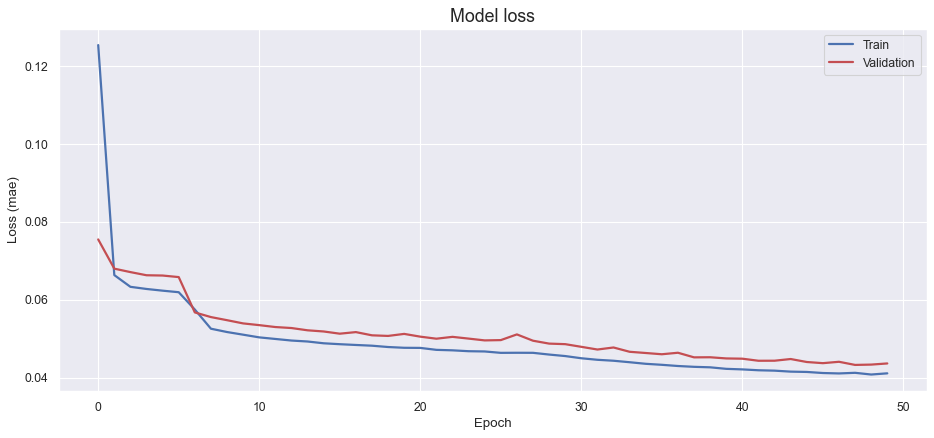

In [170]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

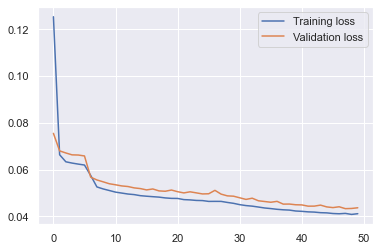

In [171]:
plt.plot(history['loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.legend();

In [172]:
model.evaluate(ds_np_train, ds_np_train)

537/537 [==============================] - 17s 31ms/step - loss: 0.0410


0.04101691022515297

In [173]:
model.evaluate(ds_np_test, ds_np_test)

283/283 [==============================] - 9s 30ms/step - loss: 0.0411


0.04107697680592537

Reconstruction error threshold: 0.2169879423095829


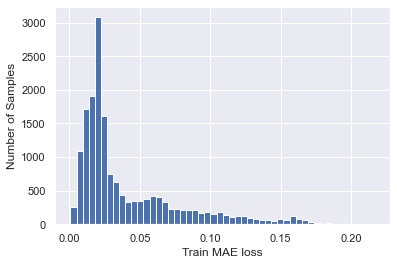

In [174]:
#train_mae_loss plot
ds_np_train_pred = model.predict(ds_np_train, verbose=0)
train_mae_loss = np.mean(np.abs(ds_np_train_pred - ds_np_train), axis=(1,2))

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

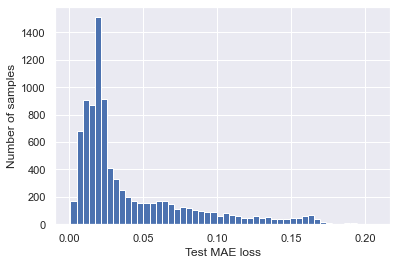

In [175]:
#test_mae_loss plot
ds_np_test_pred = model.predict(ds_np_test, verbose=0)
test_mae_loss = np.mean(np.abs(ds_np_test_pred-ds_np_test), axis=(1,2))

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [176]:
threshold

0.2169879423095829

In [220]:
#detect train set anomaly 
anomalies1 = train_mae_loss > 0.180
anomalies1.shape
unique_elements, counts_elements = np.unique(anomalies1, return_counts=True)
unique_elements, counts_elements

(array([False,  True]), array([17148,    26]))

In [221]:
result1 = np.where(anomalies1)
result1

(array([   92,   226,  2030,  2191,  2480,  3219,  3459,  3742,  3979,
         4325,  5327,  5440,  6122,  6299,  7536,  7588,  8059,  8102,
         8542,  9824,  9995, 11548, 11920, 14079, 14324, 14952]),)

In [ ]:
#print train set anomaly request
target_index=[None]*len(result1[0])
for c_,i in enumerate(result1[0]):
    print(df_train.index.levels[0][i])
    target_index[c_] = df_train.index.levels[0][i]
target_index = np.unique(target_index)

In [228]:
#detect test set anomaly
anomalies2 = test_mae_loss > 0.18
anomalies2.shape
unique_elements, counts_elements = np.unique(anomalies2, return_counts=True)
unique_elements, counts_elements

(array([False,  True]), array([9026,   21]))

In [229]:
result2 = np.where(anomalies2)
result2

(array([1185, 1293, 1526, 1689, 2095, 2611, 2878, 2986, 3531, 4207, 4497,
        5836, 6401, 6754, 7055, 7075, 7319, 7536, 7605, 7810, 8458]),)

In [ ]:
#print test set anomaly request
target_index_test=[None]*len(result2[0])
for c_,i in enumerate(result2[0]):
    print(df_test.index.levels[0][i])
    target_index_test[c_] = df_test.index.levels[0][i]
target_index_test = np.unique(target_index_test)

In [231]:
#save model
model.save('anomaly_detection_model.h5')
print('model saved')

model saved


In [253]:
train_precision.set_index('ip_agent').head()

,IP,time,useragent,responsetime,responselength,hour,depth,robot,"(Get,)","(Head,)","(Options,)","(Post,)","(Put,)","(1,)","(2,)","(3,)","(4,)","(5,)"
ip_agent,,,,,,,,,,,,,,,,,,
"41.181.1.76 :Mozilla/5.0 (Linux; Android 9; G9) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Mobile Safari/537.36",41.181.1.76,2021-05-12 05:06:02+04:30,Mozilla/5.0 (Linux; Android 9; G9) AppleWebKit...,0.388889,0.000000,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"4.138.31.112 :Mozilla/5.0 (Linux; Android 6.0.1; SM-C5010) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36",4.138.31.112,2021-05-12 05:06:03+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SM-C5010) A...,0.500000,0.730255,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"35.117.114.180 :Mozilla/5.0 (Linux; Android 9; SM-A105F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.86 Mobile Safari/537.36",35.117.114.180,2021-05-12 05:06:05+04:30,Mozilla/5.0 (Linux; Android 9; SM-A105F) Apple...,0.500000,0.334102,0,0.5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
"35.110.222.153 :Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-J710GN Build/MMB29K) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/4.0 Chrome/44.0.2403.133 Mobile Safari/537.36",35.110.222.153,2021-05-12 05:06:06+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,0.166667,0.797806,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"131.200.114.188 :Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Mobile Safari/537.36",131.200.114.188,2021-05-12 05:06:06+04:30,Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) A...,0.166667,0.000000,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [233]:
#assignment train set anomaly label
tmp = train_precision.copy()
tmp['predict']=False
tmp=tmp.set_index('ip_agent')
tmp.loc[target_index,'predict']=True
tmp.predict.value_counts()

False    17148
True        26
Name: predict, dtype: int64

In [234]:
#assignment test set anomaly label
tmp_test = test_precision.copy()
tmp_test['predict']=False
tmp_test=tmp_test.set_index('ip_agent')
tmp_test.loc[target_index_test,'predict']=True
tmp_test.predict.value_counts()

False    9026
True       21
Name: predict, dtype: int64

In [254]:
tmp.head()

,IP,time,useragent,responsetime,statuscode,responselength,method,path,hour,request,...,"(Head,)","(Options,)","(Post,)","(Put,)","(1,)","(2,)","(3,)","(4,)","(5,)",predict
ip_agent,,,,,,,,,,,,,,,,,,,,,
"41.181.1.76 :Mozilla/5.0 (Linux; Android 9; G9) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Mobile Safari/537.36",41.181.1.76,2021-05-12 05:06:02+04:30,Mozilla/5.0 (Linux; Android 9; G9) AppleWebKit...,0.388889,3,0.000000,Get,fonts/fontawesome_webfont.woff2?v=4.7.0,0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
"4.138.31.112 :Mozilla/5.0 (Linux; Android 6.0.1; SM-C5010) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.99 Mobile Safari/537.36",4.138.31.112,2021-05-12 05:06:03+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SM-C5010) A...,0.500000,2,0.730255,Get,images/fav_icon2.ico,0,15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False
"35.117.114.180 :Mozilla/5.0 (Linux; Android 9; SM-A105F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.86 Mobile Safari/537.36",35.117.114.180,2021-05-12 05:06:05+04:30,Mozilla/5.0 (Linux; Android 9; SM-A105F) Apple...,0.500000,2,0.334102,Post,/api/cs0/uxEvents,0,17,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,False
"35.110.222.153 :Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-J710GN Build/MMB29K) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/4.0 Chrome/44.0.2403.133 Mobile Safari/537.36",35.110.222.153,2021-05-12 05:06:06+04:30,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,0.166667,2,0.797806,Get,images/cooler_service_banner.png,0,15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False
"131.200.114.188 :Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Mobile Safari/537.36",131.200.114.188,2021-05-12 05:06:06+04:30,Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) A...,0.166667,3,0.000000,Get,fonts/sanjagh_icon_font_5.woff,0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False


In [236]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

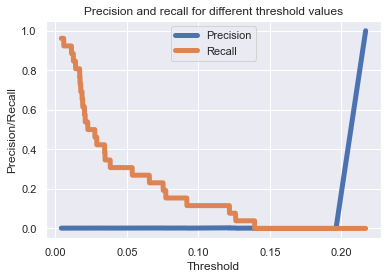

In [237]:
#plot train set precision recall
ds_np_train_pred = model.predict(ds_np_train)
train_mae_loss = np.mean(np.abs(ds_np_train_pred - ds_np_train), axis=(1,2))

error_df = pd.DataFrame({'Reconstruction_error': train_mae_loss,
                       'True_class': tmp.predict.tolist()})

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

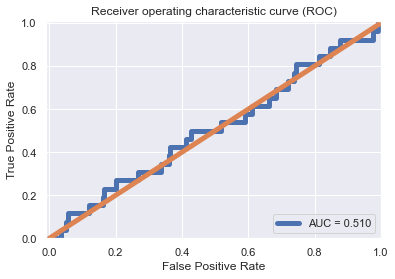

In [238]:
#plot train set ROC Curve and AUC
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

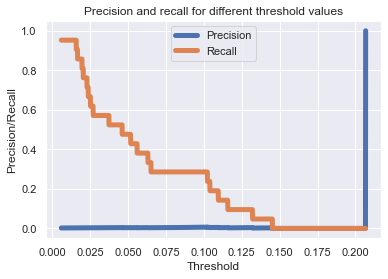

In [239]:
#plot test set precision recall
ds_np_test_pred = model.predict(ds_np_test)
test_mae_loss = np.mean(np.abs(ds_np_test_pred-ds_np_test), axis=(1,2))


error_df = pd.DataFrame({'Reconstruction_error': test_mae_loss,
                       'True_class': tmp_test.predict.tolist()})

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

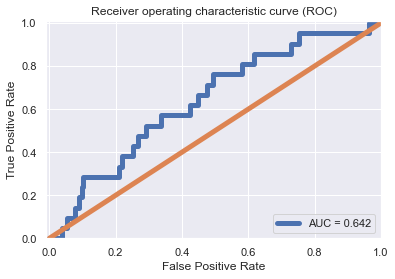

In [240]:
#plot test set ROC Curve and AUC
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [241]:
#compare No. of anomaly detected
print(tmp['anomaly'].value_counts())
print(tmp['predict'].value_counts())
print(tmp_test['anomaly'].value_counts())
print(tmp_test['predict'].value_counts())

False    17164
True        10
Name: anomaly, dtype: int64
False    17148
True        26
Name: predict, dtype: int64
False    9037
True       10
Name: anomaly, dtype: int64
False    9026
True       21
Name: predict, dtype: int64


In [242]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#train set metrics
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(tmp['anomaly'], tmp['predict'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(tmp['anomaly'], tmp['predict'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(tmp['anomaly'], tmp['predict'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(tmp['anomaly'], tmp['predict'])
print('F1 score: %f' % f1)

In [ ]:
#test set metrics
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(tmp_test['anomaly'], tmp_test['predict'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(tmp_test['anomaly'], tmp_test['predict'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(tmp_test['anomaly'], tmp_test['predict'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(tmp_test['anomaly'], tmp_test['predict'])
print('F1 score: %f' % f1)

In [245]:
train_precision.ip_agent.duplicated().sum()/len(train_precision)

0.0